In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('AdventHealth_Orlando_CM.csv')

C:\Users\jcing\AppData\Local\Temp\ipykernel_174852\3718499701.py:4: DtypeWarning: Columns (1,2,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AdventHealth_Orlando_CM.csv')


In [2]:
df.head()

,description,drug_information,code,type,minimum,maximum,gross_charge,discounted_cash,setting,payer_name,plan_name,standard_charge_dollar,standard_charge_algorithm,estimated_amount,methodology,standard_charge_percentage
0,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,NaN,11,APR-DRG,23471.0,28165.0,0.01,0.01,inpatient,Better_Health_Medicaid,Negotiated_Dollar,24644.0,APR-DRG,22180.0,case rate,NaN
1,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,NaN,11,APR-DRG,23471.0,28165.0,0.01,0.01,inpatient,Aetna_,Better_Health_Healthy_Kids,28165.0,APR-DRG,25349.0,case rate,NaN
2,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,NaN,11,APR-DRG,23471.0,28165.0,0.01,0.01,inpatient,Florida_Community_Care,Medicaid,25113.0,APR-DRG,22602.0,case rate,NaN
3,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,NaN,11,APR-DRG,23471.0,28165.0,0.01,0.01,inpatient,Molina,Medicaid,25818.0,APR-DRG,23236.0,case rate,NaN
4,LIVER TRANSPLANT AND/OR INTESTINAL TRANSPLANT,NaN,11,APR-DRG,23471.0,28165.0,0.01,0.01,inpatient,Simply_Health,Medicaid,24879.0,APR-DRG,22391.0,case rate,NaN


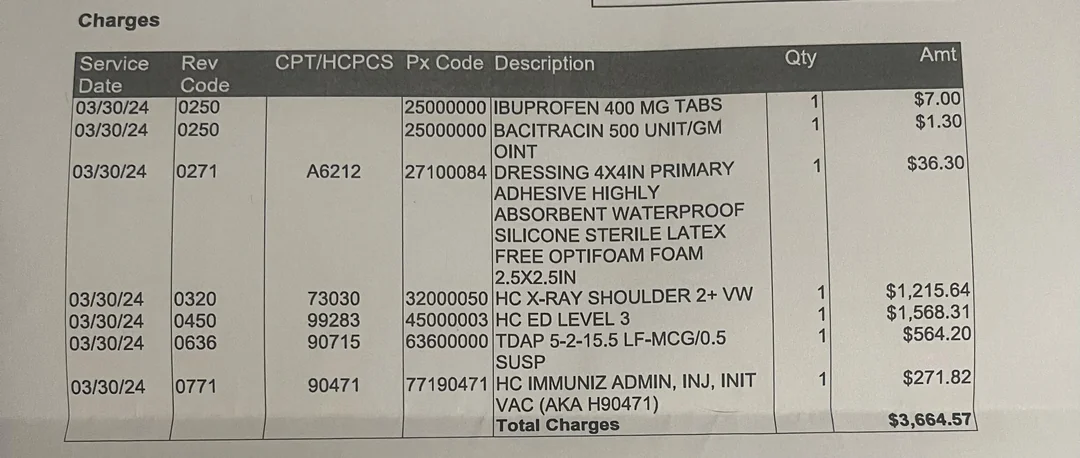

Given the reddit user's background on their profile, its likely some AdventHealth Hospital. Let's take the codes and see if we can guess what healthcare plan they're using.

In [ ]:
codes = ['A6212', 73030, 99283, 90715, 90471]
rev_codes = ['0250', '0271', '0320', '0450', '0636', '0771']
combined_codes = codes + rev_codes


In [11]:
charges_CPT = df[df['code'].isin(codes)]
charges_REV = df[df['code'].isin(rev_codes)]

In [17]:
charges_CPT.head()

,description,drug_information,code,type,minimum,maximum,gross_charge,discounted_cash,setting,payer_name,plan_name,standard_charge_dollar,standard_charge_algorithm,estimated_amount,methodology,standard_charge_percentage
215232,HC X-RAY SHOULDER 2+ VW,NaN,73030,CPT,308.0,676.0,751.0,300.4,inpatient,Aetna,ASA_PPO,473.0,NaN,426.0,percent of total billed charges,0.630
215233,HC X-RAY SHOULDER 2+ VW,NaN,73030,CPT,308.0,676.0,751.0,300.4,inpatient,Aetna,International_PPO,488.0,NaN,439.0,percent of total billed charges,0.650
215234,HC X-RAY SHOULDER 2+ VW,NaN,73030,CPT,308.0,676.0,751.0,300.4,inpatient,Aetna_Whole_Health,HMO_PPO,488.0,NaN,439.0,percent of total billed charges,0.650
215235,HC X-RAY SHOULDER 2+ VW,NaN,73030,CPT,308.0,676.0,751.0,300.4,inpatient,AvMed,HMO,412.0,NaN,371.0,percent of total billed charges,0.548
215236,HC X-RAY SHOULDER 2+ VW,NaN,73030,CPT,308.0,676.0,751.0,300.4,inpatient,Beech_Street_Corporation,PPO,526.0,NaN,473.0,percent of total billed charges,0.700


In [20]:
def find_payer_plan_for_amount(df, codes, amount):
    # Filter for the relevant codes
    filtered = df[df['code'].isin([str(c) for c in codes])]
    # Remove duplicate codes, keeping the first occurrence
    filtered = filtered.drop_duplicates(subset='code')
    # Group by payer_name and plan_name
    results = []
    for (payer, plan), group in filtered.groupby(['payer_name', 'plan_name']):
        min_sum = group['minimum'].sum()
        max_sum = group['maximum'].sum()
        if min_sum <= amount <= max_sum:
            results.append({
                'payer_name': payer,
                'plan_name': plan,
                'min_sum': min_sum,
                'max_sum': max_sum
            })
    return pd.DataFrame(results)

# Example usage:
X = 3665  # replace with your amount
result_df = find_payer_plan_for_amount(df, combined_codes, X)
display(result_df)

,payer_name,plan_name,min_sum,max_sum
0,Better_Health_Medicaid,Negotiated_Dollar,403.0,3773.0


Better yet, we can check if the codes that are being billed actually exist in the hospital system.

In [23]:
# Check if each code in combined_codes is present in df['code']
code_presence = {str(code): str(code) in df['code'].unique() for code in combined_codes}
for code, present in code_presence.items():
    print(f"Code {code}: {'Present' if present else 'Not Present'}")

Code A6212: Not Present
Code 73030: Not Present
Code 99283: Present
Code 90715: Present
Code 90471: Present
Code 0250: Present
Code 0271: Present
Code 0320: Not Present
Code 0450: Not Present
Code 0636: Not Present
Code 0771: Not Present
